### 실습목표
- 선형회귀 모델을 이용해 주택가격을 예측해보자

In [41]:
# 데이터 전처리 및 탐색용 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

### 머신러닝 프로세스

#### 1. 문제정의

- 호주의 주택가격을 예측하는 모델을 만들어보자

#### 2. 데이터 수집

- kaggle에 오픈된 데이터셋 활용

#### 3. 데이터 전처리 및 탐색

In [42]:
# 데이터 읽어오기
house_data = pd.read_csv('./data/melb_data.csv')
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [43]:
# 데이터 정보확인
# 입력특성과 정답특성을 확인
# 20개의 모든 입력특성을 사용하는게 좋다? -> 관련이 있는 특성을 골라서 활용하는게 좋다(특성선택)
# 결측치가 있는 컬럼 파악 -> 결측치가 있으면 분석/학습에 활용하기 어렵다 -> 전처리 필요
# 데이터 타입 확인 -> object로 되어있는 타입은 문자일 가능성이 높다 -> 숫자형태로 변환 필요
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

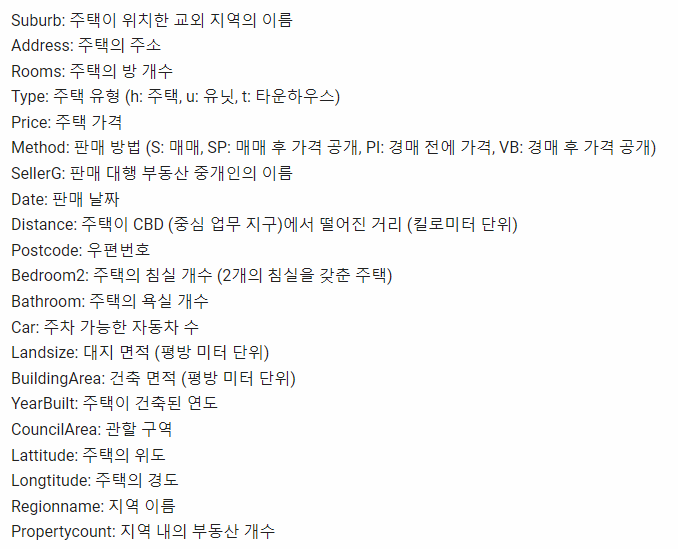

##### 데이터 탐색(EDA) 및 전처리

In [44]:
# 기술통계량 확인
# house_data.describe() # 수치형 기술통계량 확인 가능
# house_data.describe(include='all') # 수치형, 범주형 모두 기술통계량 확인 가능
house_data.describe(include='object') # 원하는 데이터 타입만 필터링해서 확인 가능

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


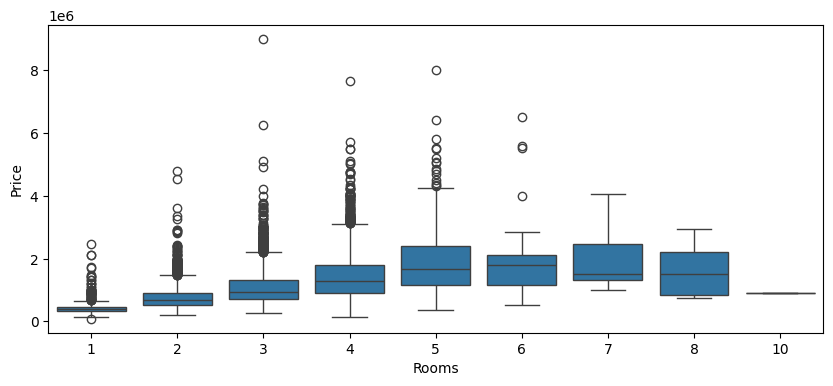

In [45]:
# Rooms : 방의 개수에 따른 주택가격의 분포 현황 확인
plt.figure(figsize=(10,4))
sns.boxplot(data = house_data,  # 활용할 데이터셋
            x = 'Rooms', y = 'Price')
plt.show()
# 방 개수가 증가할 수록 주택 가격의 중앙값이 상승
# 하지만 5개 이상은 변하는 폭이 적다

In [46]:
# 방의 개수가 3개인 데이터 추출 후 톨계치 확인
house_data[house_data['Rooms'] == 3].describe()
# 4분위 수 값을 이용해서 이상치 삭제도 가능

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5881.0,5.881000e+03,5881.000000,5881.000000,5881.000000,5881.000000,5852.000000,5881.000000,2967.000000,3336.000000,5881.000000,5881.000000,5881.000000
mean,3.0,1.076081e+06,11.003690,3099.933175,2.984696,1.473219,1.697881,597.700731,139.147184,1962.539269,-37.802929,144.987706,7311.337018
std,0.0,5.021061e+05,6.014566,91.307033,0.337715,0.564848,0.943259,5855.388012,63.043612,38.510463,0.084351,0.113417,4443.401465
min,3.0,2.830000e+05,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,3.0,7.250000e+05,7.000000,3042.000000,3.000000,1.000000,1.000000,258.000000,111.000000,1940.000000,-37.853100,144.909200,3873.000000
50%,3.0,9.500000e+05,10.500000,3075.000000,3.000000,1.000000,2.000000,472.000000,129.000000,1965.000000,-37.792700,144.996810,6482.000000
75%,3.0,1.320000e+06,13.800000,3146.000000,3.000000,2.000000,2.000000,636.000000,152.000000,1997.000000,-37.743510,145.060410,9758.000000
max,3.0,9.000000e+06,45.900000,3977.000000,20.000000,6.000000,10.000000,433014.000000,1041.000000,2017.000000,-37.408530,145.526350,21650.000000


In [47]:
# 주택타입에 따른 가격평균 시각화
house_data['Type'].unique() # 주택 타입 종류 확인

array(['h', 'u', 't'], dtype=object)

<Axes: xlabel='Type'>

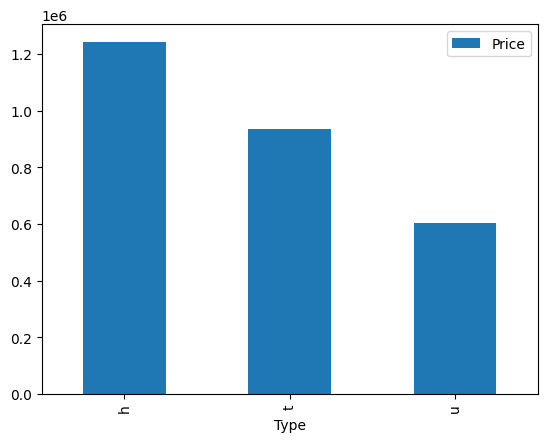

In [48]:
# 주택타입에 따른 가격평균을 bar차트 시각화
house_data[['Price', 'Type']].groupby('Type').mean().plot(kind='bar')
# 주택타입에 따라서 가격의 평균차이가 있다 -> 타입이 가격에 영향을 준다

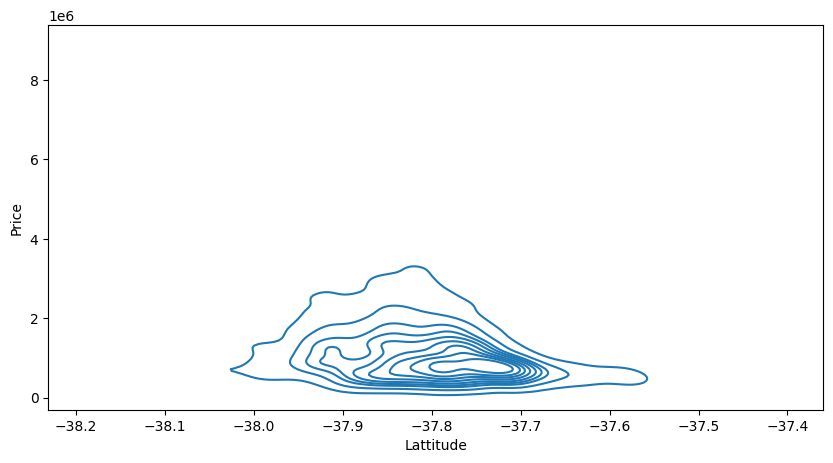

In [49]:
# 위도와 가격의 KDE(밀도추정) 그래프 시각화
plt.figure(figsize=(10,5))
sns.kdeplot(data=house_data, x='Lattitude', y='Price')
plt.show()

##### 결측치 처리하기
- 결측치가 있는 데이터를 삭제하거나 결측치를 대체값으로 채우는 선택을 할 수 있다
- 데이터 양이 많은 경우 결측치를 삭제해도 무방한 데이터 양이 적다면 대체값을 채우는게 좋은 선택이 될 수 있다. 단 대체값의 경우 올바른 값이 아니면 분석을 방해할 가능성이 있다.

In [50]:
# 결측치가 있는 특성 확인
house_data.isnull().sum().sort_values(ascending=False)/len(house_data)*100
# 결측치 비율이 높은 컬럼들은 활용할때 신중히 고민해야한다 -> 대체값 채울때도 정교하게 진행해야함
# 결측치 비율이 상대적으로 낮은 CouncliArea와 Car를 비교해보자

BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Car               0.456554
Suburb            0.000000
Bathroom          0.000000
Regionname        0.000000
Longtitude        0.000000
Lattitude         0.000000
Landsize          0.000000
Bedroom2          0.000000
Address           0.000000
Postcode          0.000000
Distance          0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Propertycount     0.000000
dtype: float64

In [51]:
house_data['Car'].describe()

count    13518.000000
mean         1.610075
std          0.962634
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Car, dtype: float64

In [52]:
# 결측치를 채우는 함수 -> fillna
house_data['Car'].fillna(0)
house_data['Car'] = house_data['Car'].fillna(0)

In [53]:
# 결측치 비율 재확인
house_data.isnull().sum().sort_values(ascending=False)/len(house_data)*100

BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Suburb            0.000000
Bathroom          0.000000
Regionname        0.000000
Longtitude        0.000000
Lattitude         0.000000
Landsize          0.000000
Car               0.000000
Bedroom2          0.000000
Address           0.000000
Postcode          0.000000
Distance          0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Propertycount     0.000000
dtype: float64

In [54]:
# suburb(지역이름)을 통해서 CouncliArea(관할구역) 결측치를 채워보자
house_pivot = house_data.pivot_table(index=['Suburb','CouncilArea'], # 행에 표현될 컬럼 선택
                                    values='Rooms', # 결측치가 없는 컬럼 선택(다른것도 가능)
                                    aggfunc='count') # 갯수를 세주는 집계함수 설정

In [55]:
# 하나의 지역이 2개 이상의 관할구역에 배정되어 있는 경우가 있음
# 개인선택 : 빈도가 높은 관할구역으로 결측치가 채워지도록 함
house_pivot.head(50)

Rooms
Suburb             CouncilArea         
Abbotsford         Yarra             55
Aberfeldie         Moonee Valley     40
Airport West       Moonee Valley     61
Albanvale          Brimbank           4
Albert Park        Port Phillip      64
Albion             Brimbank          38
Alphington         Darebin           25
                   Yarra              7
Altona             Hobsons Bay       69
Altona Meadows     Hobsons Bay        4
Altona North       Hobsons Bay       49
Ardeer             Brimbank           2
Armadale           Stonnington       86
Ascot Vale         Moonee Valley    125
Ashburton          Boroondara        53
Ashwood            Monash            45
Aspendale          Kingston           4
Aspendale Gardens  Kingston           2
Avondale Heights   Moonee Valley     73
Bacchus Marsh      Moorabool          1
Balaclava          Port Phillip      25
Balwyn             Boroondara       101
Balwyn North       Boroondara       151
Bayswater          Knox              12
Bayswater North    Maroondah          5
Beaconsfield       Cardinia           2
Beaconsfield Upper Cardinia           1
Beaumaris          Bayside           11
Bellfield          Banyule           15
Bentleigh          Glen Eira        131
Bentleigh East     Glen Eira        234
Berwick            Casey             11
Black Rock         Bayside            8
Blackburn          Whitehorse        13
Blackburn North    Whitehorse         7
Blackburn South    Whitehorse         8
Bonbeach           Kingston           1
Boronia            Knox              12
Box Hill           Whitehorse        54
Braybrook          Maribyrnong       44
Briar Hill         Banyule            5
Brighton           Bayside          176
Brighton East      Bayside          124
                   Glen Eira          4
Broadmeadows       Hume              17
Brookfield         Melton             1
Brooklyn           Brimbank           1
                   Hobsons Bay        7
Brunswick          Moreland         208
Brunswick East     Moreland          80

In [56]:
# 최빈값으로 구성된 테이블 생성
council_mode_table = house_data.groupby('Suburb')['CouncilArea'].agg(pd.Series.mode)
council_mode_table

Suburb
Abbotsford              Yarra
Aberfeldie      Moonee Valley
Airport West    Moonee Valley
Albanvale            Brimbank
Albert Park      Port Phillip
                    ...      
Wonga Park         Manningham
Wyndham Vale          Wyndham
Yallambie             Banyule
Yarra Glen       Yarra Ranges
Yarraville        Maribyrnong
Name: CouncilArea, Length: 314, dtype: object

In [57]:
# apply 함수를 이용해서 각 행마다 결측치를 처리
def fill_council(row):
    if pd.isnull(row['CouncilArea']) : # 결측치인 경우
        return council_mode_table[row['Suburb']]
    else :
        return row['CouncilArea']

In [58]:
house_data.apply(fill_council, axis=1)
house_data['CouncilArea'] = house_data.apply(fill_council, axis=1)

In [59]:
# 결측치 비율 재확인
house_data.isnull()
house_data.isnull().sum()
house_data.isnull().sum().sort_values(ascending=False)
house_data.isnull().sum().sort_values(ascending=False)/len(house_data)*100

BuildingArea     47.496318
YearBuilt        39.580265
Suburb            0.000000
Bathroom          0.000000
Regionname        0.000000
Longtitude        0.000000
Lattitude         0.000000
CouncilArea       0.000000
Landsize          0.000000
Car               0.000000
Bedroom2          0.000000
Address           0.000000
Postcode          0.000000
Distance          0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Propertycount     0.000000
dtype: float64

In [60]:
# 각 컬럼과 Price 사이의 상관계수 확인
house_data.corr(numeric_only=True)
house_data.corr(numeric_only=True)['Price']
house_data.corr(numeric_only=True)['Price'].sort_values()

YearBuilt       -0.323617
Lattitude       -0.212934
Distance        -0.162522
Propertycount   -0.042153
Landsize         0.037507
BuildingArea     0.090981
Postcode         0.107867
Longtitude       0.203656
Car              0.234825
Bathroom         0.467038
Bedroom2         0.475951
Rooms            0.496634
Price            1.000000
Name: Price, dtype: float64

##### 학습을 위한 전처리
- 특성선택
- 글자 -> 숫자변경(인코딩)
- 지도학습을 위한 문제, 답 분리
- 훈련, 평가 데이터 분리

In [61]:
# 학습에 사용할 입력특성 선택
feature_names = ['Rooms','Bedroom2','Bathroom','Lattitude','Longtitude','Type','CouncilArea']       
feature_names = ['Rooms','Bedroom2','Bathroom','Lattitude','Longtitude','Type_encoding','CouncilArea']       
feature_names = ['Rooms','Bedroom2','Bathroom','Lattitude','Longtitude','Type_encoding']       

In [62]:
# 인코딩 작업
# 인코딩 방법 2가지 => 1. 원핫인코딩 / 2. 레이블인코딩
# 원핫인코딩을 쓰는 경우 : 해당 컬럼에 순서라는 의미가 없는 경우
# 레이블인코딩을 쓰는 경우 : 해당 컬럼에 순서가 부여된 경우

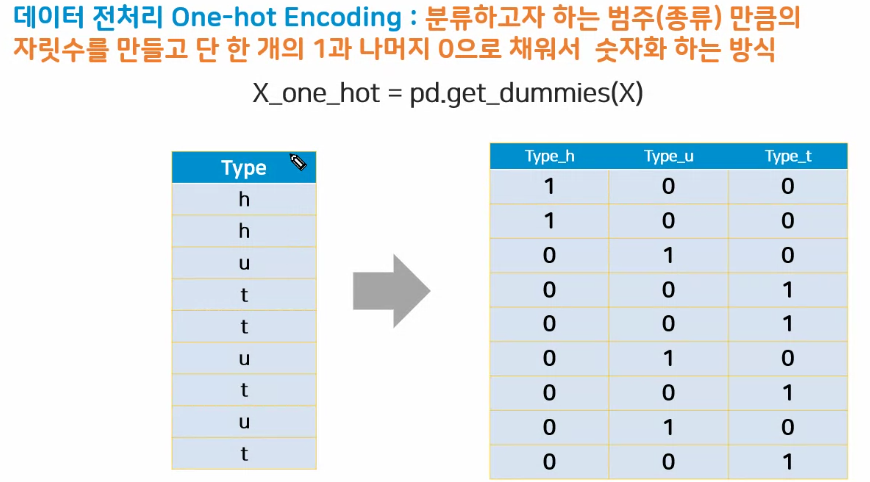
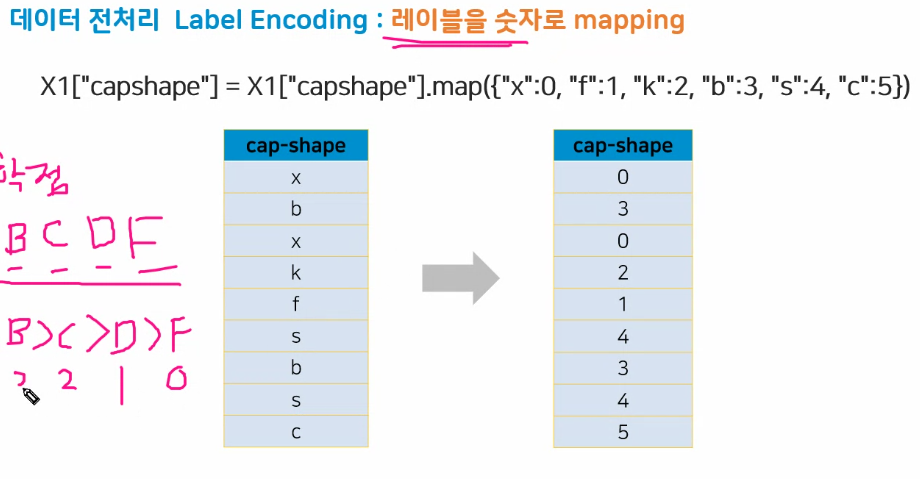

In [63]:
# type은 평균가격이 순서가 있기 때문에 레이블인코딩을 써볼수 있겠다
house_data['Type_encoding'] = house_data['Type'].map({'h':0,'t':1,'u':2})

In [64]:
house_data['CouncilArea'].astype('str').unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', 'Knox', 'Maroondah',
       'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik', 'Whittlesea',
       'Frankston', 'Macedon Ranges', 'Yarra Ranges', 'Wyndham',
       'Cardinia', 'Unavailable', 'Moorabool', '[]'], dtype=object)

In [65]:
house_data['CouncilArea'] = house_data['CouncilArea'].astype('str')

In [66]:
# '[]' 가들어있는 데이터의 index추출
house_data[house_data['CouncilArea']=='[]'].index
drop_index = house_data[house_data['CouncilArea']=='[]'].index
drop_index

Index([12251, 12438, 12865, 13245, 13264, 13381, 13494], dtype='int64')

In [67]:
house_data.drop(drop_index, inplace=True)

In [68]:
# CouncilArea는 원핫인코딩을 이용해서 동등한 크기를 지니는 숫자로 인코딩
council_one_hot = pd.get_dummies(house_data['CouncilArea'], dtype='int64')
council_one_hot = pd.get_dummies(house_data['CouncilArea'], dtype='int64',prefix='council')
council_one_hot

,council_Banyule,council_Bayside,council_Boroondara,council_Brimbank,council_Cardinia,council_Casey,council_Darebin,council_Frankston,council_Glen Eira,council_Greater Dandenong,...,council_Moreland,council_Nillumbik,council_Port Phillip,council_Stonnington,council_Unavailable,council_Whitehorse,council_Whittlesea,council_Wyndham,council_Yarra,council_Yarra Ranges
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# 선택한 특성 및 인코딩 특성을 병합
df1 = house_data[feature_names]
df1.head()

,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Type_encoding
0,2,2.0,1.0,-37.7996,144.9984,0
1,2,2.0,1.0,-37.8079,144.9934,0
2,3,3.0,2.0,-37.8093,144.9944,0
3,3,3.0,2.0,-37.7969,144.9969,0
4,4,3.0,1.0,-37.8072,144.9941,0


In [70]:
# 문제(입력특성)
X = pd.concat([df1, council_one_hot], axis=1)
# 정답
y = house_data['Price']

In [71]:
X.shape, y.shape

((13573, 39), (13573,))

In [72]:
# 훈련용, 평가용으로 분리
# 학습된 모델의 신뢰도를 확보하기 위해 평가용 데이터를 분리
# 보통 7:3의 비율로 분할
# 가능하다면 평가용 데이터가 여러 셋트로 확보되면 좋다

from sklearn.model_selection import train_test_split

#train_test_split(문제, 정답, 분리비율, 고정키)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =15)

In [73]:
# 크기확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9501, 39), (4072, 39), (9501,), (4072,))

In [74]:
# 데이터 크기확인
print('훈련용 문제 : ', X_train.shape)
print('훈련용 답 : ', y_train.shape)
print('테스트용 문제 : ', X_test.shape)
print('테스트용 답 : ', y_test.shape)

훈련용 문제 :  (9501, 39)
훈련용 답 :  (9501,)
테스트용 문제 :  (4072, 39)
테스트용 답 :  (4072,)


#### 4. 모델선택 및 학습

In [75]:
# 모델 생성
from sklearn.linear_model import LinearRegression
house_model_linear = LinearRegression()

In [76]:
# 모델 학습
house_model_linear.fit(X_train, y_train)

LinearRegression()

In [77]:
# 가중치, 절편확인하기
# y = wx + b
print('가중치 : ', house_model_linear.coef_)
print('절편 : ', house_model_linear.intercept_)

가중치 :  [ 1.59865639e+05  1.73220727e+04  1.70530932e+05 -3.03786017e+06
 -5.70018661e+05 -2.75304820e+05  7.33505851e+16  7.33505851e+16
  7.33505851e+16  7.33505851e+16  7.33505851e+16  7.33505851e+16
  7.33505851e+16  7.33505851e+16  7.33505851e+16  7.33505851e+16
  7.33505851e+16  7.33505851e+16  7.33505851e+16  7.33505851e+16
  7.33505851e+16  7.33505851e+16  7.33505851e+16  7.33505851e+16
  7.33505851e+16  7.33505851e+16  7.33505851e+16  7.33505851e+16
  7.33505851e+16  7.33505851e+16  7.33505851e+16  7.33505851e+16
  7.33505851e+16  7.33505851e+16  7.33505851e+16  7.33505851e+16
  7.33505851e+16  7.33505851e+16  7.33505851e+16]
절편 :  -7.335058515722077e+16


#### 5. 모델 평가

In [82]:
# 모델 평가
# score로 점수 내주기
print('Linear Score : ', house_model_linear.score(X_test, y_test))

Linear Score :  0.6090349343298327


In [84]:
# 평균재곱오차 metrics : 평가지표 모음집
from sklearn.metrics import mean_squared_error

In [85]:
# 평가지표
linear_pre_test = house_model_linear.predict(X_test)
print('mse : ', mean_squared_error(y_test, linear_pre_test)) # 실제값, 예측값 차이
print('rmse : ', mean_squared_error(y_test, linear_pre_test) ** 0.5)

# 제곱값은 실제 오차에 제곱이 되므로 실제를 알아보기 힘듬
# 실제 단위 달러 제곱근 씌워주기
# 40만 달러 차이

mse :  166921525850.0474
rmse :  408560.30870612897


#### 6. 모델 활용
- 추후 서비스 제작시 활용